Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

### <font color=blue size=4>For example, when modeling housing price prediction, it would be essential to know how specifically one predictor is impacting on the housing price thus requiring interpreting the final model and result. Under this circumstance, it would be preferable to use decision trees rather than random forests in that RF means more and larger trees which makes it harder to interpret the model as a whole.</font>

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

### <font color=blue size=4>For instance, in a model of weather forecast, accuracy is apparently much more important than interpretability. People are willing to know the relatively accurate weather in advance instead of how it is impacted. In this case, it might be preferable to use random forests rather than decision trees for RF could do better generalization and have higher accuracy but the interpretability would compromise.</font>

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

### <font color=blue size=4>With a random forest classifier, to get some interpretability, I would calculate feature importance represented by conditional variable importance(Strobl, C., Boulesteix, A. L., Kneib, T., Augustin, T., & Zeileis, A., 2008) which would eliminate the impact of the correlation between features.</font>

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [3]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df.head()

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [9]:
# your code here
df['MPG'].mode()

0    bad
dtype: object

In [10]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [17]:
n_good = len(df[df['MPG']=='good'])
n_bad = len(df[df['MPG']=='bad'])

In [79]:
# your code here
# The only discrete-valued variable are weight and cylinders
result = {}
print('For weight')
print('There are {} possible binary questions:'.format(
    len(df['weight'].unique().tolist())))
for w in df['weight'].unique().tolist():
    try:
        goodY = df[df['weight'] == w].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df[df['weight'] == w].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = n_good - goodY
    badN = n_bad - badY
    print('"Weight is {0}?": the information gain is {1:.4f}'.format(
        w, InformationGain(goodY, badY, goodN, badN)))
    result[w] = InformationGain(goodY, badY, goodN, badN)
print('The best split is "Weight is {0}?", with the information gain {1:.4f}'.
      format(result.keys()[result.values().index(max(result.values()))],
             max(result.values())))

result = {}
print('\nFor cylinders')
print('There are {} possible binary questions:'.format(
    len(df['cylinders'].unique().tolist())))
for w in df['cylinders'].unique().tolist():
    try:
        goodY = df[df['cylinders'] == w].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df[df['cylinders'] == w].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = n_good - goodY
    badN = n_bad - badY
    print('"Cylinders = {0}?": the information gain is {1:.4f}'.format(
        w, InformationGain(goodY, badY, goodN, badN)))
    result[w] = InformationGain(goodY, badY, goodN, badN)
print('The best split is "Cylinders = {0}?", with the information gain {1:.4f}'.
      format(result.keys()[result.values().index(max(result.values()))],
             max(result.values())))

For weight
There are 3 possible binary questions:
"Weight is light?": the information gain is 0.0971
"Weight is medium?": the information gain is 0.0000
"Weight is weighty?": the information gain is 0.1531
The best split is "Weight is weighty?", with the information gain 0.1531

For cylinders
There are 3 possible binary questions:
"Cylinders = 4?": the information gain is 0.3653
"Cylinders = 6?": the information gain is 0.1531
"Cylinders = 8?": the information gain is 0.1226
The best split is "Cylinders = 4?", with the information gain 0.3653


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [50]:
midpoints = []
for i in range(len(sorted(df['HP'].unique())) - 1):
    midpoints.append(
        (sorted(df['HP'].unique())[i] + sorted(df['HP'].unique())[i + 1]) / 2.)

In [81]:
# your code here
result = {}
print('There are {} possible binary questions:'.format(len(midpoints)))
for mid in midpoints:
    try:
        goodY = df[df['HP'] > mid].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df[df['HP'] > mid].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = n_good - goodY
    badN = n_bad - badY
    print('"HP > {0}?": the information gain is {1:.4f}'.format(
        mid, InformationGain(goodY, badY, goodN, badN)))
    result[mid] = InformationGain(goodY, badY, goodN, badN)
print(
    'The best split is "HP > {0}?", with the information gain {1:.4f}'.format(
        result.keys()[result.values().index(max(result.values()))],
        max(result.values())))

There are 16 possible binary questions:
"HP > 70.0?": the information gain is 0.1059
"HP > 78.0?": the information gain is 0.2263
"HP > 83.0?": the information gain is 0.3671
"HP > 87.0?": the information gain is 0.2142
"HP > 89.5?": the information gain is 0.3658
"HP > 91.0?": the information gain is 0.2759
"HP > 92.5?": the information gain is 0.5092
"HP > 93.5?": the information gain is 0.4295
"HP > 94.5?": the information gain is 0.3653
"HP > 97.5?": the information gain is 0.2234
"HP > 105.0?": the information gain is 0.1531
"HP > 124.5?": the information gain is 0.1226
"HP > 142.0?": the information gain is 0.0944
"HP > 157.5?": the information gain is 0.0684
"HP > 172.5?": the information gain is 0.0441
"HP > 182.5?": the information gain is 0.0214
The best split is "HP > 92.5?", with the information gain 0.5092


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

In [84]:
df[df['HP'] > 92.5].groupby('MPG').size()

MPG
bad    13
dtype: int64

In [86]:
df[df['HP'] <= 92.5].groupby('MPG').size()

MPG
bad     2
good    5
dtype: int64

### <font color=blue size=4>Based on my results for parts b and c, the optimal binary split of the data would be "HP > 92.5?". And the No split would require further partitioning</font>

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [87]:
# your code here
df1 = df[df['HP'] <= 92.5].copy()

In [99]:
n_good = len(df1[df1['MPG'] == 'good'])
n_bad = len(df1[df1['MPG'] == 'bad'])

# The only discrete-valued variable are weight and cylinders
result = {}
print('For weight')
print('There are {} possible binary questions:'.format(
    len(df1['weight'].unique().tolist())))
for w in df1['weight'].unique().tolist():
    try:
        goodY = df1[df1['weight'] == w].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df1[df1['weight'] == w].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = n_good - goodY
    badN = n_bad - badY
    print('"Weight is {0}?": the information gain is {1:.4f}'.format(
        w, InformationGain(goodY, badY, goodN, badN)))
    result[w] = InformationGain(goodY, badY, goodN, badN)
print('The best split is "Weight is {0}?", with the information gain {1:.4f}'.
      format(result.keys()[result.values().index(max(result.values()))],
             max(result.values())))

result = {}
print('\nFor cylinders')
print('There are {} possible binary questions:'.format(
    len(df1['cylinders'].unique().tolist())))
for w in df1['cylinders'].unique().tolist():
    try:
        goodY = df1[df1['cylinders'] == w].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df1[df1['cylinders'] == w].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = n_good - goodY
    badN = n_bad - badY
    print('"Cylinders = {0}?": the information gain is {1:.4f}'.format(
        w, InformationGain(goodY, badY, goodN, badN)))
    result[w] = InformationGain(goodY, badY, goodN, badN)
print(
    'The best split is "Cylinders = {0}?", with the information gain {1:.4f}'.
    format(result.keys()[result.values().index(max(result.values()))],
           max(result.values())))

midpoints = []
for i in range(len(sorted(df1['HP'].unique())) - 1):
    midpoints.append(
        (sorted(df1['HP'].unique())[i] + sorted(df1['HP'].unique())[i + 1]) /
        2.)

print('\nFor HP:')
result = {}
print('There are {} possible binary questions:'.format(len(midpoints)))
for mid in midpoints:
    try:
        goodY = df1[df1['HP'] > mid].groupby('MPG').size()['good']
    except KeyError:
        goodY = 0
    try:
        badY = df1[df1['HP'] > mid].groupby('MPG').size()['bad']
    except KeyError:
        badY = 0
    goodN = n_good - goodY
    badN = n_bad - badY
    print('"HP > {0}?": the information gain is {1:.4f}'.format(
        mid, InformationGain(goodY, badY, goodN, badN)))
    result[mid] = InformationGain(goodY, badY, goodN, badN)
print(
    'The best split is "HP > {0}?", with the information gain {1:.4f}'.format(
        result.keys()[result.values().index(max(result.values()))],
        max(result.values())))

For weight
There are 2 possible binary questions:
"Weight is light?": the information gain is 0.2917
"Weight is medium?": the information gain is 0.2917
The best split is "Weight is light?", with the information gain 0.2917

For cylinders
There are 2 possible binary questions:
"Cylinders = 4?": the information gain is 0.8631
"Cylinders = 6?": the information gain is 0.8631
The best split is "Cylinders = 4?", with the information gain 0.8631

For HP:
There are 6 possible binary questions:
"HP > 70.0?": the information gain is 0.0760
"HP > 78.0?": the information gain is 0.1696
"HP > 83.0?": the information gain is 0.2917
"HP > 87.0?": the information gain is 0.0060
"HP > 89.5?": the information gain is 0.0617
"HP > 91.0?": the information gain is 0.0760
The best split is "HP > 83.0?", with the information gain 0.2917


In [100]:
df1[df1['cylinders']==4].groupby('MPG').size()

MPG
good    5
dtype: int64

In [101]:
df1[df1['cylinders']!=4].groupby('MPG').size()

MPG
bad    2
dtype: int64

### The best split for the second layer is "Cylinders = 4?" and do not require further split.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

![alt text](HW1_zz1749.png)

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light   <font color=blue size=2>Bad</font>

?,6,113,medium  <font color=blue size=2>Bad</font>

?,4,83,weighty  <font color=blue size=2>Good</font>

?,4,95,weighty  <font color=blue size=2>Bad</font>


### Question 3, Predicting burden of disease （40 pts)

In [102]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [155]:
# from sklearn.preprocessing import label_binarize

In [156]:
X = data[data.columns[1:-1]]
y = data[data.columns[-1]]
# y = label_binarize(y, classes=data[data.columns[-1]].unique().tolist())

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999)
OS = []
for i in range(2, 500, 25):
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train, y_train)
    OS.append(dt.score(X_test, y_test))

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

In [166]:
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


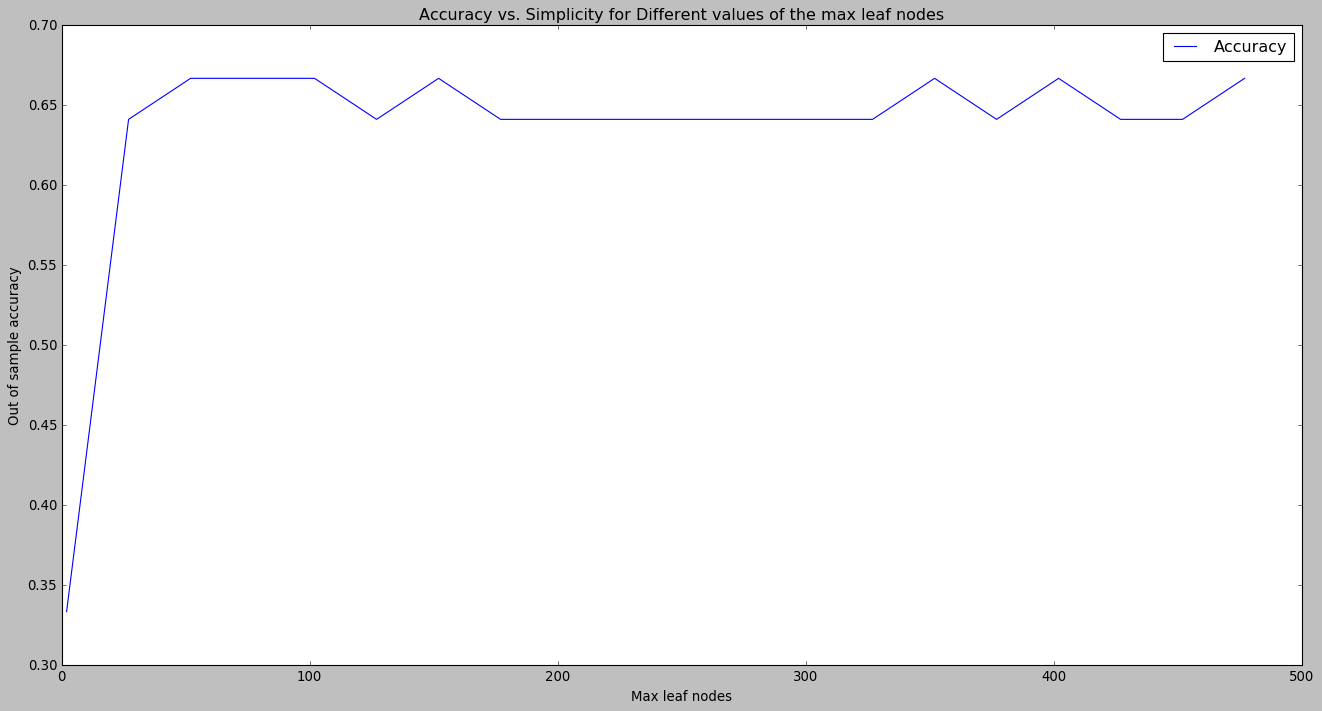

In [168]:
plt.figure(figsize=(20, 10))
plt.plot(range(2, 500, 25), OS, label='Accuracy')
plt.xlabel('Max leaf nodes')
plt.ylabel('Out of sample accuracy')
plt.title('Accuracy vs. Simplicity for Different values of the max leaf nodes')
plt.legend()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [174]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.3, random_state=999)

In [175]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 500, 25)}
dt=DecisionTreeClassifier()
gs=GridSearchCV(dt,param_grid=param_grid)
rs=gs.fit(Xt,yt)
print(rs.best_params_)

{'max_leaf_nodes': 27}


In [177]:
print('The out of sample accuracy after tuning the hyper-parameter is {}'.format(rs.score(X_test,y_test)))

The out of sample accuracy after tuning the hyper-parameter is 0.615384615385


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [179]:
dt = DecisionTreeClassifier(max_leaf_nodes=27)
dt.fit(Xt, yt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=27,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

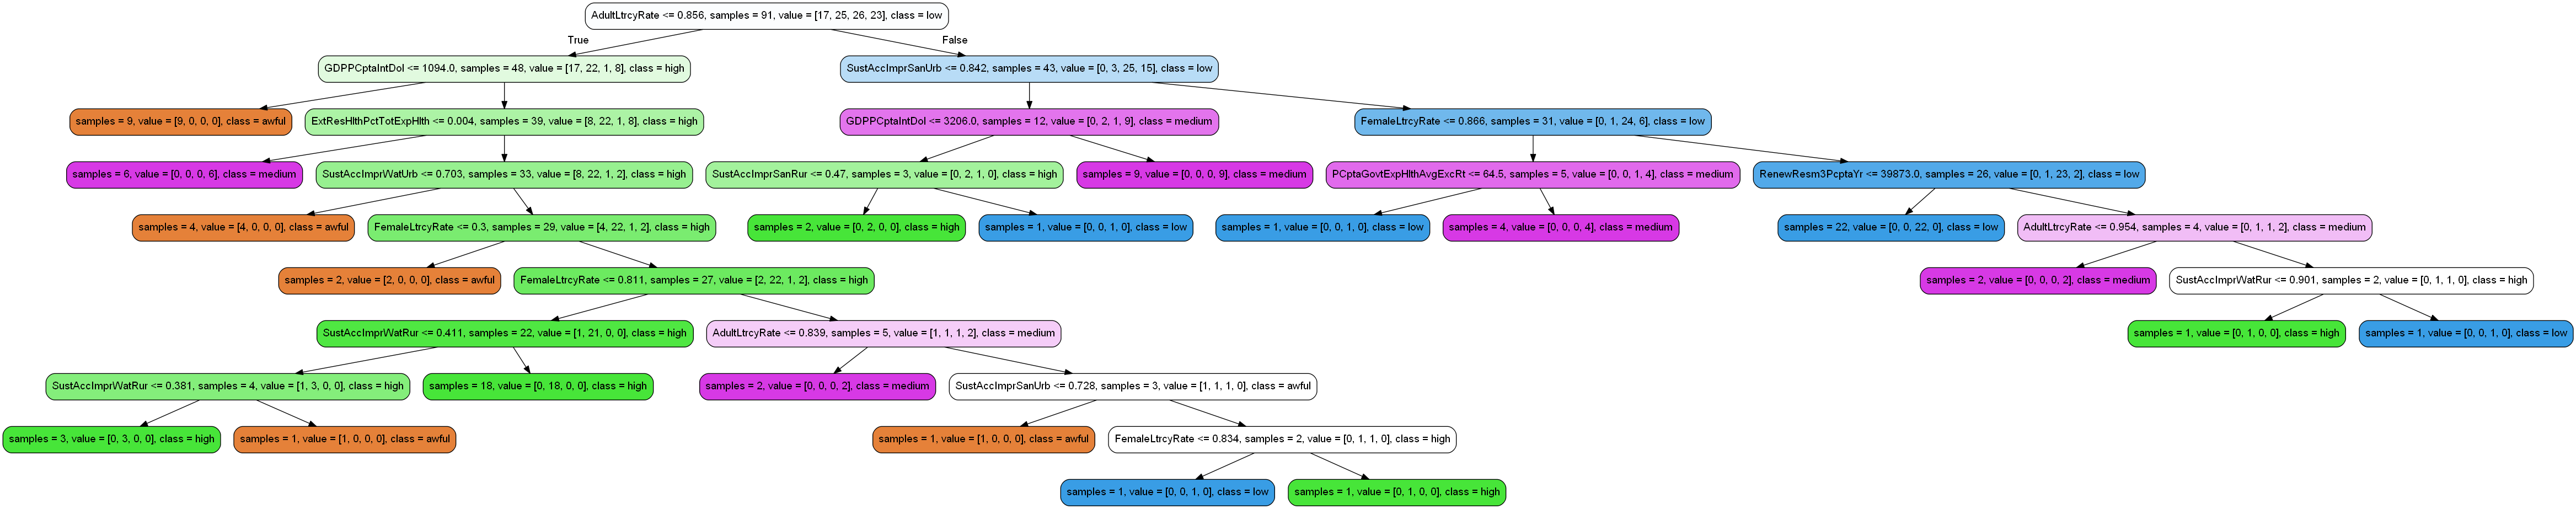

In [188]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
# your code here

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png(),width=2000, height=1000)  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [196]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':range(1,51,5)}
rf=RandomForestClassifier(n_jobs=-1,max_leaf_nodes=27)
gs=GridSearchCV(rf,param_grid=param_grid)
rs=gs.fit(X_train,y_train)
# your code here

In [197]:
rs.best_params_

{'n_estimators': 36}

In [198]:
rs.score(Xv,yv)

0.71794871794871795

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

<font color=blue size=4>We could see that the random forest classifier's accuracy is much higher than the decision tree classifier using the same data and same max_leaf_nodes hyper-parameter. However, it is also much harder to interpret the random forest model compared to the decision tree model which could be interpreted easily with a graph but in a random forest model we could only get interpretability by calculating feature importance</font>